Brendan MacMichael
Metric: Safety
Creation Date: 11/26/2024

Introduction

This project is to determine the best neighborhood in the city of Pittsburgh. In order to accomplish this our group had to choose four metrics by which we could measure what makes a neighborhood the best. Our group, Flight 22 decided on the metrics of Safety, Health, Education, and Food which we deemed to be the most important qualities of a neighborhood to make it the best. While there are other aspects important to consider when determining the best neighborhood such as affordability and recreational areas, we decided on our four based off their necesity to living and that they were all able to measured and ranked in a systematic way.

My Metric

My metric is safety, and to examine which neighborhoods are the safest I am utilizing a dataset that contains the arrest record of crimes committed in Pittsburgh. To measure how safe a neighborhood is I first narrow my search down to only neighborhoods that we deemed as competitors for this competition due to the necesity of all group members data sets needing to be able to have said neighborhoods. Then I looked at the total number of crimes committed in each neighborhood and compared it to the total population of the neighborhood. Then I looked at the number of violent vs nonviolent crimes commited in each neighborhood because while all crimes are terrible, safety wise, it is more important that a person is not injured vs someone stealing something or some equivalent charge. I then utilized graphs to showcase the data so that it was easier for people to understand the final analysis of which neighborhood was the safest.

In [1]:
import pandas as pd

data = pd.read_csv('Safety_Data.tsv', sep='\t')
data.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


Set up Explanation

Imported Pandas and printed the first 5 instances in the file

In [2]:
dictArea = {}
validAreas = {"Shadyside", "Bloomfield", "Oakwood", "Highland Park", "Westwood", "East Allegheny", "Crafton Heights", "Greenfield", "Brookline", "East Liberty"}

for index, row in data.iterrows():
   
    if(row['INCIDENTNEIGHBORHOOD'] in validAreas):
        try:
            dictArea[row['INCIDENTNEIGHBORHOOD']] += 1
        except:
            dictArea[row['INCIDENTNEIGHBORHOOD']] = 1

print(dictArea)

{'Bloomfield': 984, 'Westwood': 226, 'East Allegheny': 2217, 'Crafton Heights': 601, 'Greenfield': 537, 'Brookline': 1390, 'East Liberty': 1889, 'Highland Park': 558, 'Shadyside': 971, 'Oakwood': 82}


Dictionary and Iteration Explantion

I first created a dictionary to contain all incidents from the neighborhoods that I wanted to examine. I then created an array that held all of the neighborhoods from my data set that I wanted to examine for this project, my group limited the nieghborhoods based of which ones exist in all of our datasets. Then I iterated through every single row in the data set and totaled the number of incidents for each neighborhood. This is so that the total number of crimes is not greater than it actually is due to one person committing multiple crimes at once which in this case I am counting as one incident.

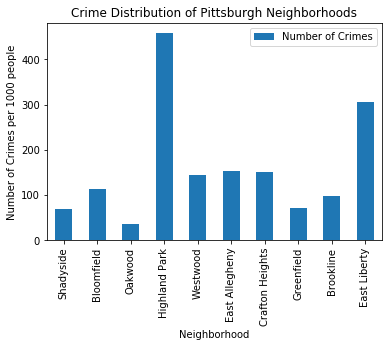

In [4]:
SSPOP = 14215/1000
BFPOP = 8665/1000
OWPOP = 2248/1000
HPPOP = 1218/1000
WWPOP = 1559/1000
EAPOP = 14444/1000
CHPOP = 3951/1000
GFPOP = 7542/1000
BLPOP = 14258/1000
ELPOP = 6187/1000


Relevent_Data = pd.DataFrame({"Neighborhood": ["Shadyside", "Bloomfield", "Oakwood", "Highland Park", "Westwood", "East Allegheny", "Crafton Heights", "Greenfield", "Brookline", "East Liberty"],
                            "Number of Crimes": [dictArea["Shadyside"]/SSPOP, dictArea["Bloomfield"]/BFPOP, dictArea["Oakwood"]/OWPOP, dictArea["Highland Park"]/HPPOP, dictArea["Westwood"]/WWPOP, dictArea["East Allegheny"]/EAPOP, dictArea["Crafton Heights"]/CHPOP, dictArea["Greenfield"]/GFPOP, dictArea["Brookline"]/BLPOP, dictArea["East Liberty"]/ELPOP] })




Relevent_Data.plot.bar(x = 'Neighborhood', y = 'Number of Crimes', title = 'Crime Distribution of Pittsburgh Neighborhoods', xlabel = 'Neighborhood', ylabel = 'Number of Crimes per 1000 people')

Bar Graph and DataFrame Explanation

I first created variables of the population of each neighborhood per 1000 people in it. Then I created a dataframe of the data that is relevant to my metric, the neighborhood and the number of arrests in each neighborhood. After that I had it plot a bar graph to showcase which neighborhoods are the safest and most dangerous based off number of arrests per 1000 people in the neighborhood.

In [5]:
SS = {}
BF = {}
OW = {}
HP = {}
WW = {}
EA = {}
CH = {}
GF = {}
BL = {}
EL = {}

crimes = [SS, BF, OW, HP, WW, EA, CH, GF, BL, EL]
crimeTypeV = ['Assault', 'Death', 'Homicide', 'Endangering', 'Cruelty', 'Abuse', 'Injury', 'Fighting']
validAreas = ["Shadyside", "Bloomfield", "Oakwood", "Highland Park", "Westwood", "East Allegheny", "Crafton Heights", "Greenfield", "Brookline", "East Liberty"]

for index, row in data.iterrows():
   
    if(row['INCIDENTNEIGHBORHOOD'] in validAreas):
        hood = validAreas.index(row['INCIDENTNEIGHBORHOOD'])
        if (type(row['OFFENSES']) == str and any(x in row['OFFENSES'] for x in crimeTypeV)):
            try:
                crimes[hood]["Violent"] += 1
            except:
                crimes[hood]["Violent"] = 1
        else:
            try:
                crimes[hood]["Non-Violent"] += 1
            except:
                crimes[hood]["Non-Violent"] = 1
for x in range(len(crimes)):
    print(validAreas[x])
    print("Violent: " + str(crimes[x]["Violent"]))
    print("Non-Violent: " + str(crimes[x]["Non-Violent"]))

Shadyside
Violent: 182
Non-Violent: 789
Bloomfield
Violent: 238
Non-Violent: 746
Oakwood
Violent: 32
Non-Violent: 50
Highland Park
Violent: 139
Non-Violent: 419
Westwood
Violent: 81
Non-Violent: 145
East Allegheny
Violent: 263
Non-Violent: 1954
Crafton Heights
Violent: 264
Non-Violent: 337
Greenfield
Violent: 193
Non-Violent: 344
Brookline
Violent: 527
Non-Violent: 863
East Liberty
Violent: 461
Non-Violent: 1428


Violent vs Non-Violent Crimes Explanation

I first created an array that held an empty dictionary which related to each of the neighborhoods. Then I created an array of strings filled with key words that if present in the OFFENSES row would indicate whether a crime was violent. I then recreated my validAreas list as an array so that I could utilize the index function when iterating through the data. Then I finally iterated through the data, if the incident occured in a valid neighborhood I then checked whether the offense contained any of the key words which indicate a violent crime, if it did, then I added one to the 'Violent' total stored in that specific neighborhoods dictionary, if it didn't contain any of the keywords then I did the same thing except for the 'Non-Violent" total.

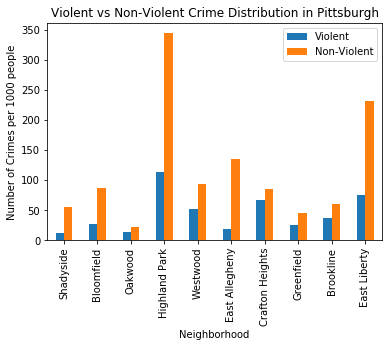

In [6]:
hoodPop = [SSPOP, BFPOP, OWPOP, HPPOP, WWPOP, EAPOP, CHPOP, GFPOP, BLPOP, ELPOP]
CTD = {'Neighborhood': validAreas, 'Violent': [crimes[x]['Violent']/hoodPop[x] for x in range(len(crimes))], 'Non-Violent': [crimes[x]['Non-Violent']/hoodPop[x] for x in range(len(crimes))]}
crimeTypeData = pd.DataFrame(CTD)
crimeTypeData.plot.bar(x='Neighborhood', y = ['Violent', 'Non-Violent'], title = 'Violent vs Non-Violent Crime Distribution in Pittsburgh', 
                       ylabel = 'Number of Crimes per 1000 people', xlabel = 'Neighborhood')

Crime Type Bar Graph Explanation

I created an array of all the neighhoods population by 1000 people. Then I created a list that stored my x value and two y values for my bar graph. Then I created the DataFrame. Then using the DataFrame I created a bar graph that shows the number of violent and non-violent crimes that occur in each neighborhood. This allwos us to see the true safety ranking of each neighborhood.

Conclusion

The three safest neighborhoods are Shadyside, Oakwood, and Greenfield. Highland Park, Crafton Heights, and East Liberty are the three most dangerous neighborhoods. Given how unsafe Highland Park and East Liberty are they can be taken out of consideration for the best neighborhood race. Oakwood and Shadyside can be given a major bump for both low violent crime and non-violent crimes. East Allegheny and Greenfield gain minor bumps for having such a low violence rate but semi high crime rate and an overall low crime rate respectively. As for Bloomfield, Westwood, and Brookeline, they can all still be considered for the race of best neighborhood but only if the ones mentioned above are significantly worse in other metrics explored. If giving the title of best neighborhood in Pittsburgh solely based off how safe it is then Oakwood would take the cake as the one neighborhood with the overall lowest crime rate, the lowest non-violent crime rate, and it has the second lowest violent crime rate because Shadyside beats it out by the smallest amount.